<h1 align="center" style="color:#8B4513">Прогноз оттока клиентов фитнес-центра</h1>

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. В данной работе необходимо провести анализ и подготовить план действий по удержанию клиентов:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
      1) выделить целевые группы клиентов;
      2) предложить меры по снижению оттока;
      3) определить другие особенности взаимодействия с клиентами.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общее-описание-признаков" data-toc-modified-id="Общее-описание-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Общее описание признаков</a></span></li><li><span><a href="#Гистограммы-признаков" data-toc-modified-id="Гистограммы-признаков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Гистограммы признаков</a></span></li><li><span><a href="#Матрица-корреляции" data-toc-modified-id="Матрица-корреляции-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Матрица корреляции</a></span></li></ul></li><li><span><a href="#Прогнозирование-оттока-клиентов" data-toc-modified-id="Прогнозирование-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Прогнозирование оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans 
import itertools

In [2]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.rcParams['axes.grid'] = True
pd.set_option('display.float_format', '{:,.2f}'.format)
sns.set(font_scale=1.15, style='whitegrid', palette='dark')

## Загрузка и изучение данных

In [3]:
try:
    df = pd.read_csv()
except:
    df = pd.read_csv()
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0


Описание данных:
- `'Churn'` — факт оттока в текущем месяце;
- Текущие поля в датасете:
  Данные клиента за предыдущий до проверки факта оттока месяц:
    - `'gender'` — пол;
    - `'Near_Location'` — проживание или работа в районе, где находится фитнес-центр;
    - `'Partner'` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    - `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    - `'Phone'` — наличие контактного телефона;
    - `'Age'` — возраст;
    - `'Lifetime'` — время с момента первого обращения в фитнес-центр (в месяцах).
- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    - `'Contract_period'` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
    - `'Month_to_end_contract'` — срок до окончания текущего действующего абонемента (в месяцах);
    - `'Group_visits'` — факт посещения групповых занятий;
    - `'Avg_class_frequency_total'` — средняя частота посещений в неделю за все время с начала действия абонемента;
    - `'Avg_class_frequency_current_month'` — средняя частота посещений в неделю за предыдущий месяц;
    - `'Avg_additional_charges_total'` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## Предобработка данных

Посмотрим на названия столбцов, чтобы определить корректность их написания

In [4]:
df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

Для удобства и единообразия переведем названия в нижний регистр

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Посмотрим на общую информацию

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Пропусков в таблице нет, типы данных в норме, посмотрим есть ли дупликаты

In [7]:
df.duplicated().sum()

0

Дупликатов нет.

**Вывод**

Таблица с данными о клиентах фитнес-центра содержит 4000 записей в 14 столбцах: типы данных корректны, дупликатов и пропусков нет. Данные готовы для анализа.

## Исследовательский анализ данных

### Общее описание признаков

Посмотрим на общую статистику датасета

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,"4,000.00",0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,"4,000.00",0.85,0.36,0.00,1.00,1.00,1.00,1.00
partner,"4,000.00",0.49,0.50,0.00,0.00,0.00,1.00,1.00
promo_friends,"4,000.00",0.31,0.46,0.00,0.00,0.00,1.00,1.00
phone,"4,000.00",0.90,0.30,0.00,1.00,1.00,1.00,1.00
contract_period,"4,000.00",4.68,4.55,1.00,1.00,1.00,6.00,12.00
group_visits,"4,000.00",0.41,0.49,0.00,0.00,0.00,1.00,1.00
age,"4,000.00",29.18,3.26,18.00,27.00,29.00,31.00,41.00
avg_additional_charges_total,"4,000.00",146.94,96.36,0.15,68.87,136.22,210.95,552.59
month_to_end_contract,"4,000.00",4.32,4.19,1.00,1.00,1.00,6.00,12.00


Судя по среднему и стандартному отклонению, женщин и мужчин, среди клиентов фитнес-центра, примерно поровну, большинство живут или работают недалеко от фитнес-центра, некоторые клиенты не указали контактный номер телефона, среднее время с момента первого обращения в фитнес-центр - 4 месяца, среднее количество посещений в неделю - 2 раза.

Посмотрим на средние значения признаков среди ушедших и посещающих клиентов

In [9]:
df.groupby('churn').agg('mean').T

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


Клиенты в оттоке впервые появились в среднем месяц назад, имеют действующий котракт около 2 месяцев, в отличии от постоянно посещающих клуб - пришли около 5 месяцев назад и покупают абонемент на полгода. К тому же, клиенты в оттоке более молодые, меньше тратят на дополнительные товары и услуги, реже посещают клуб и среди них меньше клиентов пришедших по акции приведи друга.

### Гистограммы признаков

Посмотрим на распределение значений признаков, кроме тех признаков, которые принимают значение 0 или 1, т.к. их распределение очевидно.

Гистограммы некоторых признаков


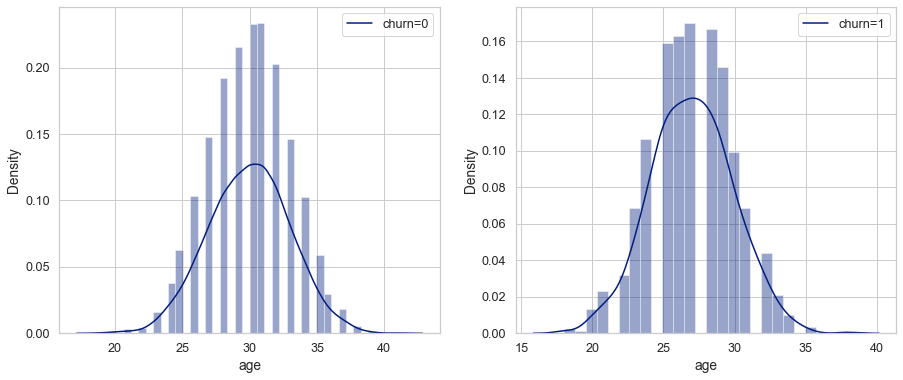

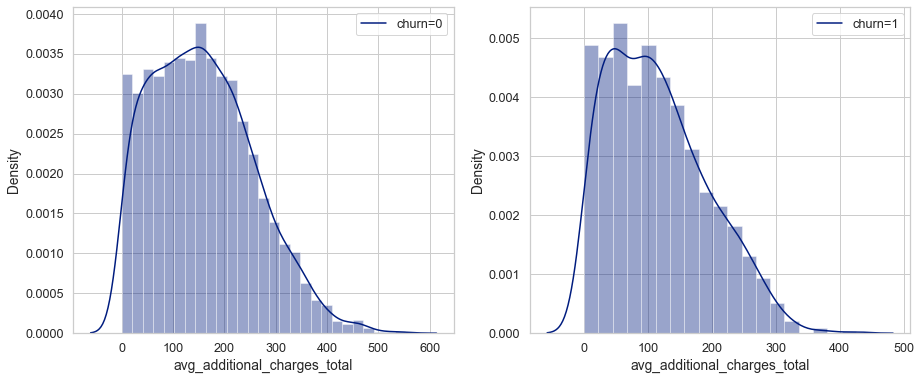

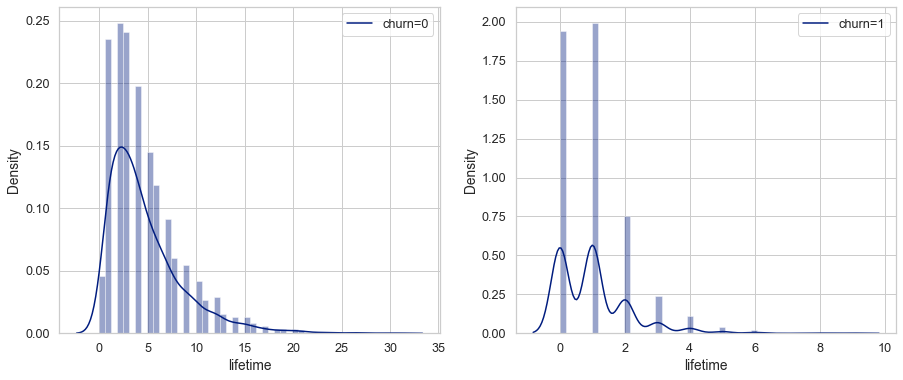

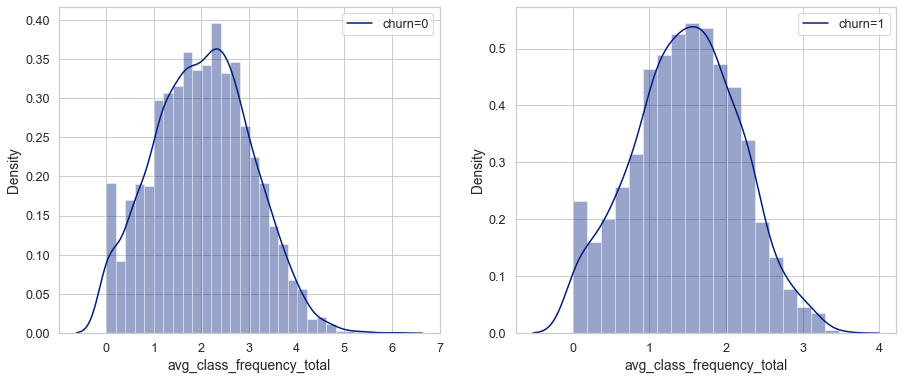

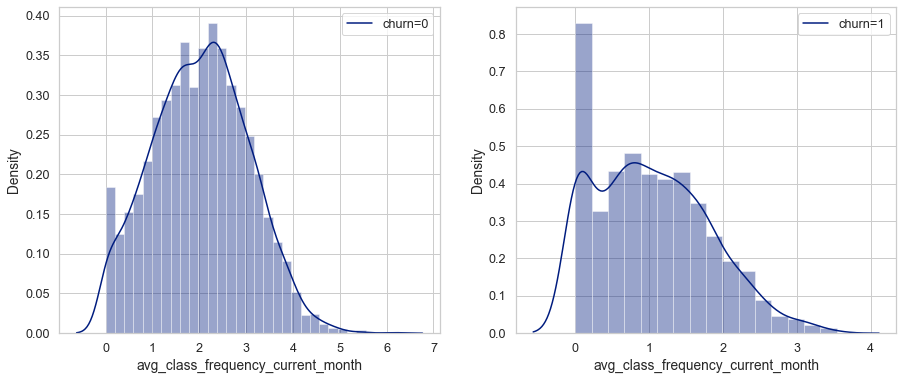

In [10]:
print('Гистограммы некоторых признаков')
for i in ['age', 'avg_additional_charges_total', 'lifetime',
          'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    sns.distplot(df[df.churn == 0][i], ax=plt.subplot(1,2,1)).legend(['churn=0'])
    sns.distplot(df[df.churn == 1][i], ax=plt.subplot(1,2,2)).legend(['churn=1'])
    plt.show()

Гистограммы подтверждают выводы сделанные в п. 3.1: те кто в оттоке позже появились и имеют менее длительные абонементы, а посещающие - пришли давно и абонементы заключают на более длительный сорк. К тому же, распределение почти всех признаков признаков близко к нормальному, кроме категориальных признаков, где всего две категории 1 и 0.

### Матрица корреляции

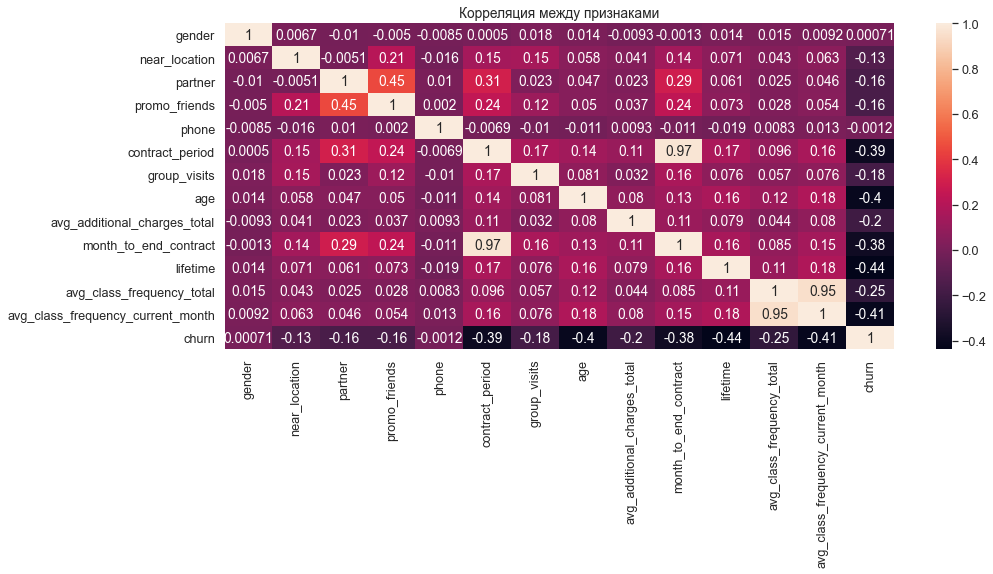

In [11]:
sns.heatmap(df.corr(), annot=True)
plt.title('Корреляция между признаками')
plt.show()

Самая большая корреляция между длительностью текущего действующего абонемента и сроком до его окончания, возможно, потому что данные для датафрейма были каким-то образом структурированы, либо абонементы приобретаются примерно в одно время и данные взяты вскоре после этого времени. Также большая корреляция есть между данными о средней частоте посещения в неделю за все время и за текущую неделю, но это и понятно - средняя частота посещения не меняется. Есть заметная корреляция между признаками `promo_friends` и `partner`: некоторые клиенты, работающие в компании партнере клуба, приводят с собой друзей по акции "приведи друга". Небольшая обратная корреляция наблюдается между `churn` (т.е. фактом оттока) и `contract_period` (чем меньше срок абонемента, тем вероятнее, что клиент в оттоке), `age` (чем меньше возраст, тем вероятнее, что клиент в оттоке), `lifetime` (чем меньше время с момента первого обращения в фитнес-центр, тем вероятнее, что клиент в оттоке), `avg_class_frequency_current_month` ( чем меньше средняя частота посещений в неделю, тем вероятнее, что клиент в оттоке).

## Прогнозирование оттока клиентов

Построим модель прогнозирования оттока клиентов и модель бинарной классификации клиентов, целевой признак - отток клиентов (`churn`), модели для прогнозирования и классификации - логистическая регрессия и случайный лес.

Разделим данные на целевые признаки (х) и целевую переменную (у). Т.к. логистическая регрессия относится к линейной модели, то необходимо удалить один из сильно скоррелированных признаков, например, `avg_class_frequency_current_month` и `month_to_end_contract`. К тому же, для обоих моделей нужны стандартизированые данные, чтобы уровнять масштабы признаков.

In [12]:
x = df.drop(['churn', 'avg_class_frequency_current_month',
             'month_to_end_contract'], axis=1)
y = df.churn

Разделим данные на обучающую и тестовую выборки методом *train_test_split*, в соотношении 80:20 и с параметром *random_state* равным 0

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Стандартизируем выборки: создадим объект класса *StandardScaler*, обучим и трансформируем обучающую выборку и на основе обученной модели, трансформируем тестовую выборку

In [14]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)
x_test_st = scaler.transform(x_test)

Теперь можно приступить к обучению и предсказанию стандартизированных выборок, оценивать модели будем следующими метриками - доля правильных ответов (*accuracy*), точность (*precision*) и полнота (*recall*). Обучать, предсказывать и рассчитывать метрики будем в цикле - для логистической регрессии и для случайного леса.

In [15]:
models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0)]
for i in models:
    m = i
    m.fit(x_train_st, y_train)
    y_pred = m.predict(x_test_st)
    print(f'''
    {i}
    Доля правильных ответов: {accuracy_score(y_test, y_pred):.2f}
    Точность: {precision_score(y_test, y_pred):.2f}
    Полнота: {recall_score(y_test, y_pred):.2f}
    
    ''')


    LogisticRegression(random_state=0)
    Доля правильных ответов: 0.90
    Точность: 0.79
    Полнота: 0.81
    
    

    RandomForestClassifier(random_state=0)
    Доля правильных ответов: 0.89
    Точность: 0.79
    Полнота: 0.76
    
    


Обе модели показывают высокую долю правильных объектов, но на эту метрику не стоит полагаться, потому что она требует баланса классов 50:50, а в нашем случае он составляет: 73:27. Зато обе модели показали одинаковую точность, т.е. долю правильных ответов среди предсказанного класса "1". Логистическая регрессия показала большую полноту, т.е долю правильных ответов класса "1" относительно реальных данных.

## Кластеризация клиентов

Построим дендрограмму с помощью функции *linkage* для определения числа возможных кластеров. Для стандартизации есть готовая таблица без целевого признака, а удаленные признаки не повлияют на результат, т.к. отражают те же значения, что и в скоррелированных признаках, только за меньший период времени. 

Стандартизируем данные

In [16]:
sc = StandardScaler()
x_st = sc.fit_transform(x)

И построим денлрограмму

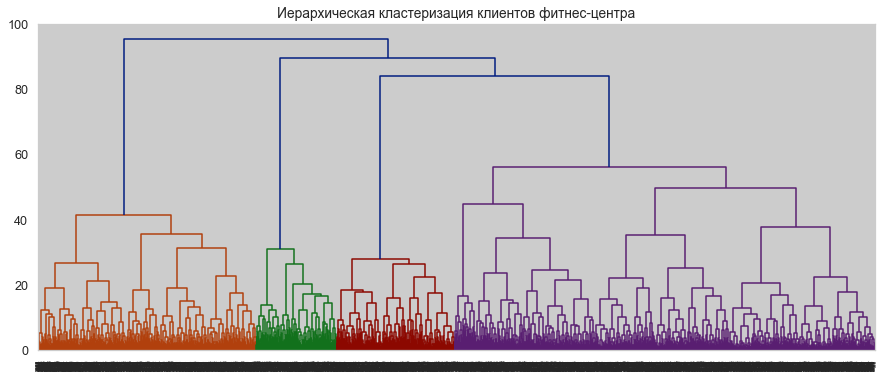

CPU times: total: 4min 57s
Wall time: 4min 59s


In [17]:
%%time
linked = linkage(x_st, method='ward')
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов фитнес-центра')
plt.show()

Оптимальное число кластеров, которые представлены на рисунке - 4, но лучще взять 5 кластеров, чтобы детальнее посмотреть на клиентов фитнес-центра.

Обучим модель алгоритмом *KMeans*, число кластеров зададим - 5. Обучим и сохраним вектор кластеров

In [18]:
km = KMeans(n_clusters=5, random_state=0)
df_labels = km.fit_predict(x_st)

Добавим полученный список в основную таблицу

In [19]:
df['cluster'] = df_labels

Посмотрим средние значения признаков в кластерах

In [20]:
df.groupby('cluster').agg('mean').T

cluster,0,1,2,3,4
gender,0.50,0.49,0.51,0.54,0.52
near_location,0.00,1.00,1.00,1.00,0.86
partner,0.49,0.96,0.24,0.25,0.47
promo_friends,0.08,0.89,0.06,0.08,0.31
phone,1.00,1.00,1.00,1.00,0.00
contract_period,3.03,7.66,2.82,4.53,4.78
group_visits,0.24,0.46,0.00,1.00,0.43
age,28.72,29.54,28.77,29.54,29.30
avg_additional_charges_total,137.54,155.86,143.38,148.09,144.21
month_to_end_contract,2.85,6.99,2.65,4.17,4.47


Видно, что кластер "0" отличается от остальных тем, что его клиенты живут или работают в разных районах с фитнес-центром, клиенты кластера "1" отличаются тем, что использовали промо-код от знакомого при оплате первого абонемента и имеют большую длительность текущего действующего абонемента, клиенты кластера "4" - не сообщили контактный номер телефона, кластеры "2" и "3" - имеют небольшое число клиентов, являющихся сотрудниками компании-партнера клуба и записавшихся в рамках акции приведи друга, а отличаются они посещением групповых занятий - никто из клиентов кластера "2" не посещает их, а из кластера "3" - посещают все.

Построим распределение признаков по кластерам.

Гистограммы некоторых признаков


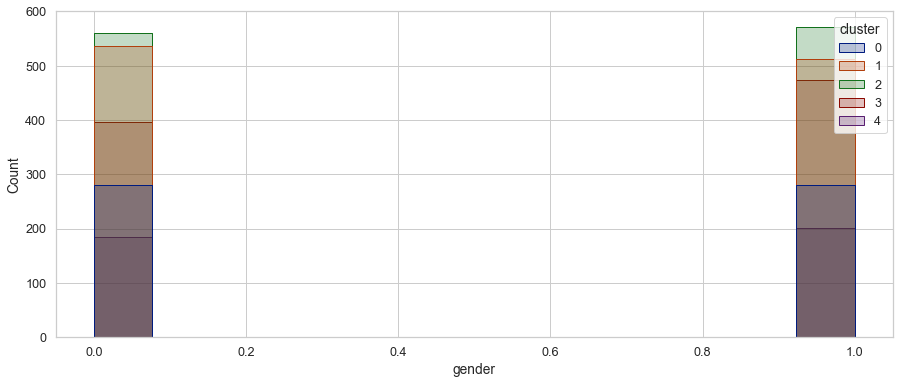

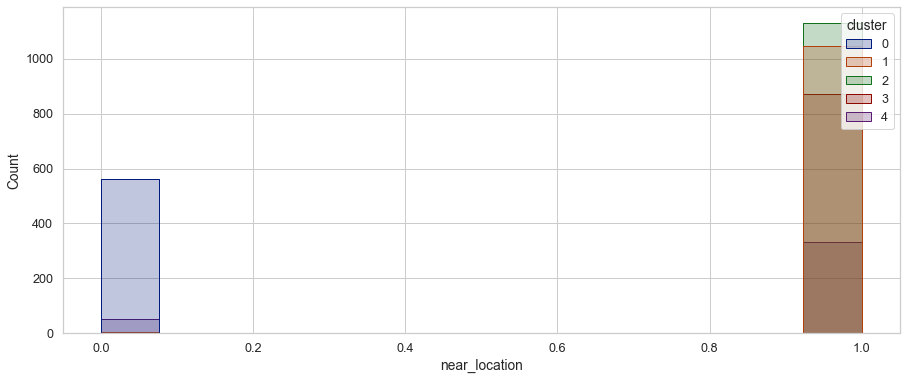

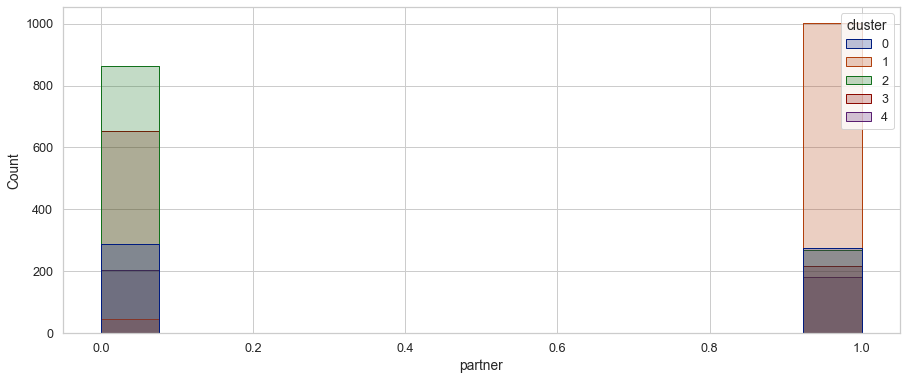

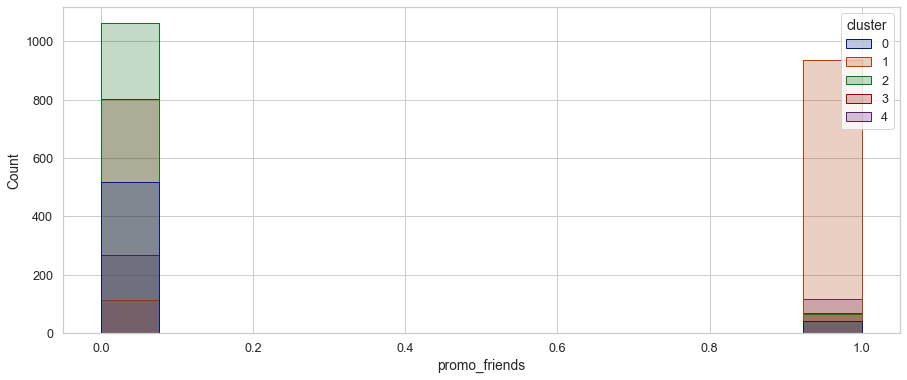

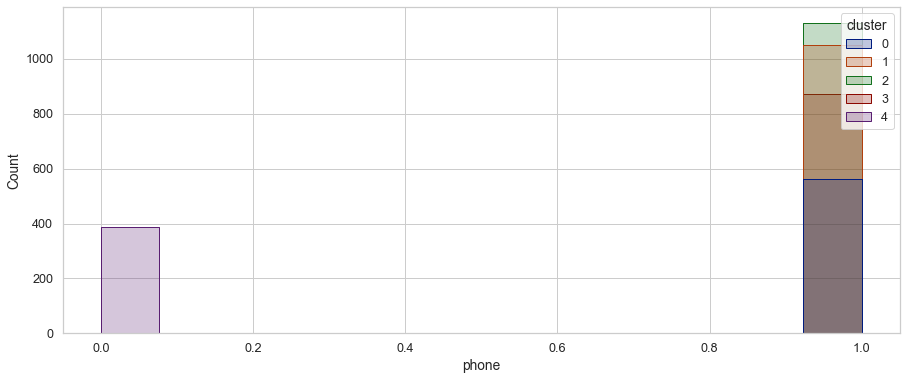

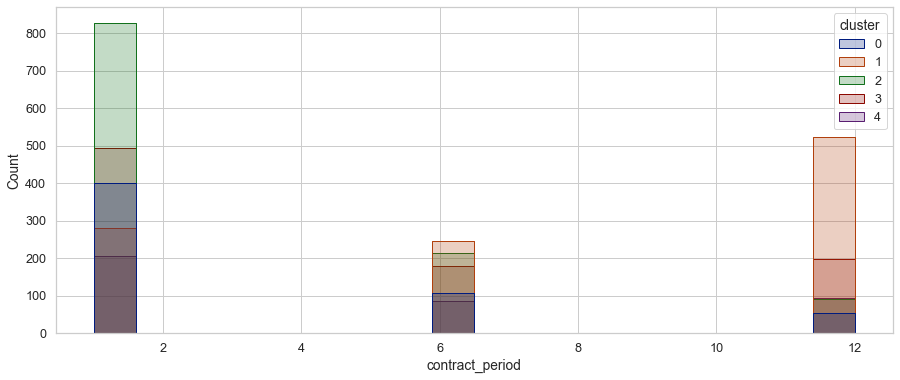

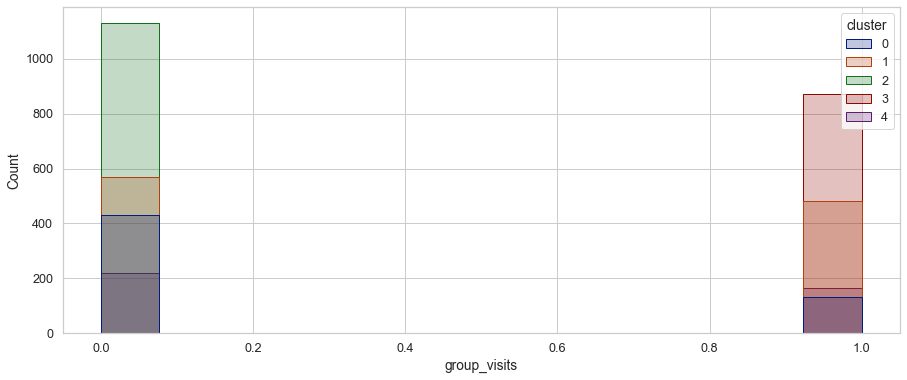

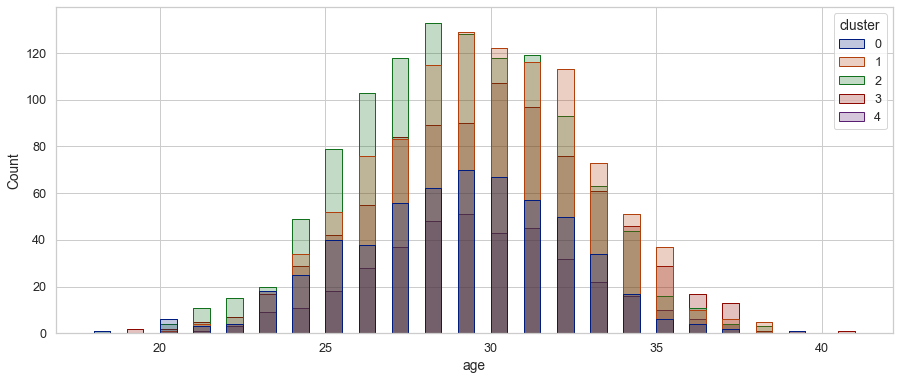

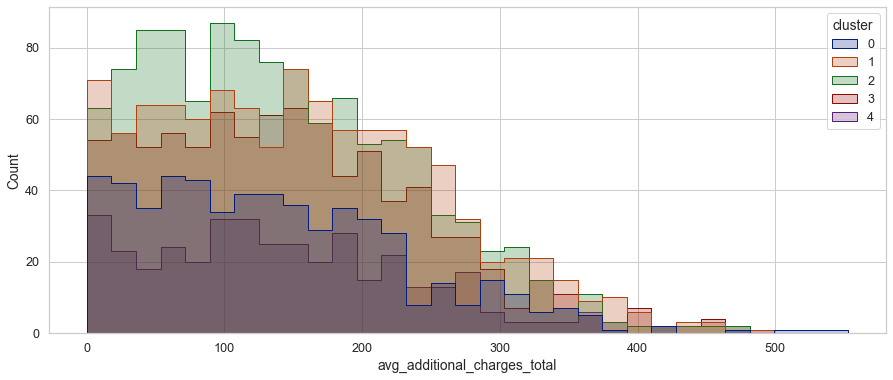

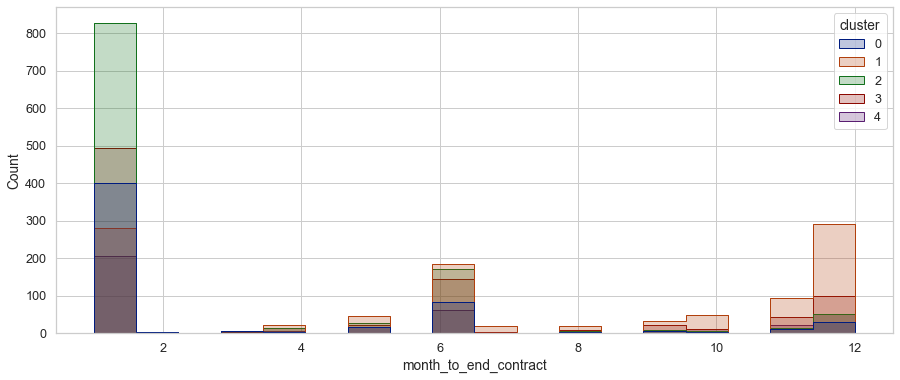

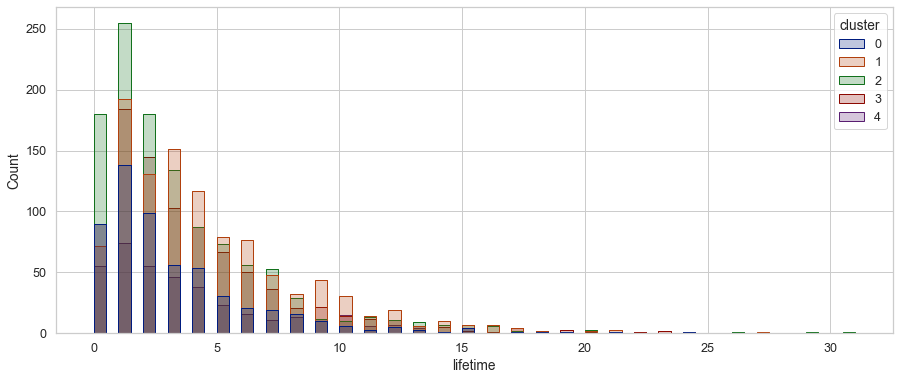

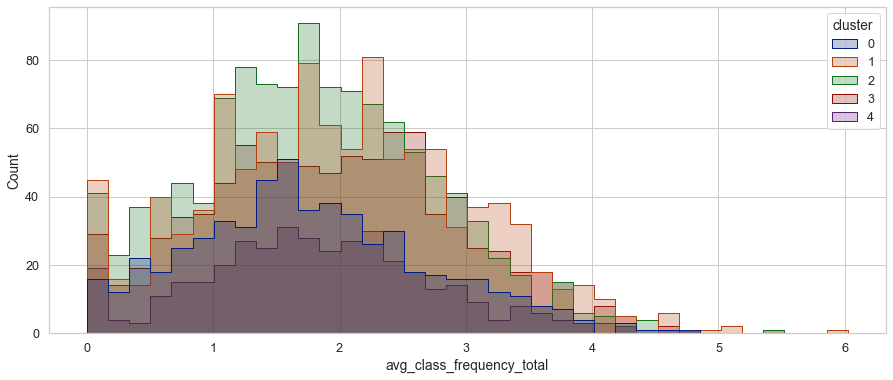

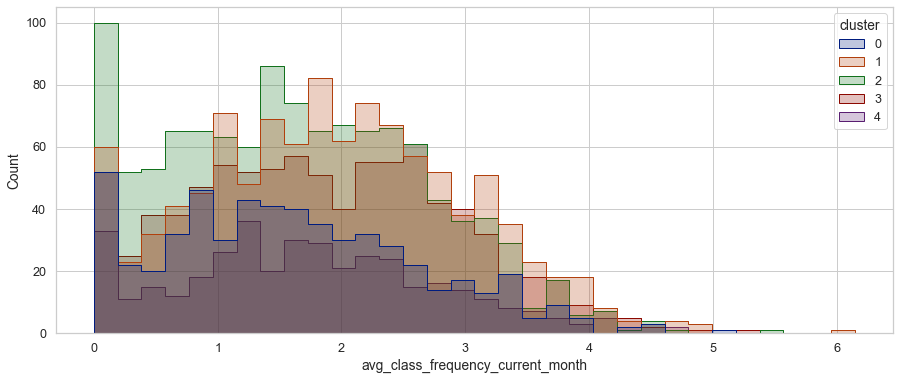

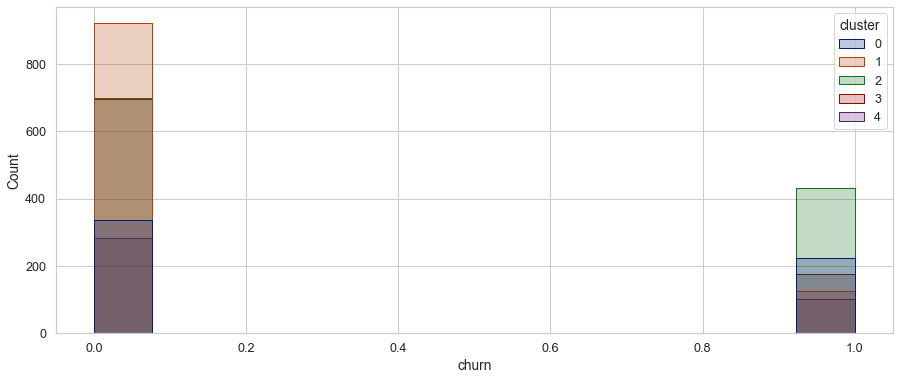

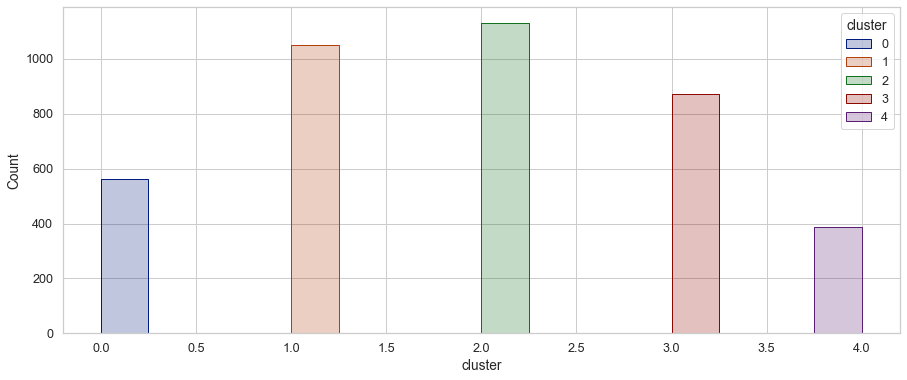

In [21]:
print('Гистограммы некоторых признаков')
for i in df.columns:
    sns.histplot(data=df, x=i, hue='cluster', palette='dark', element='step')
    plt.show()

По гистограммам видно, что кластер "1" отличается, кроме уже указанных признаков, большим количеством клиентов - сотрудников компании-партнера клуба. Заметно, что во второй кластер попало больше всего клиентов - больше 1100, в кластере "1" тоже больше 1000, а в кластере "4" минимум клиентов - около 400, и ни один, как было уже сказано, не оставил конактного телефона.

Прсмотрим на долю оттока клиентов в каждом кластере

In [22]:
df.groupby('cluster').apply(lambda x: x.churn.sum() / x.churn.count()).sort_values()

cluster
1   0.12
3   0.20
4   0.27
2   0.38
0   0.40
dtype: float64

Самые надежны клиенты - сотрудники компании-партнера клуба, пришедшии по акции приведи друга, посещающие групповые занятия, в возрасте 29-30 лет, зарегистрировавшиеся 3-4 месяца назад. К оттоку склонны клиенты, проживающие в других районах города и заключающие абонемент на меньший срок - 2-3 месяца. 

## Вывод

Исследование проведено по 4000 записей о посетителях. Женщин и мужчин, среди клиентов фитнес-центра, примерно поровну, большинство живут или работают недалеко от центра, не все клиенты указали контактный номер телефона, среднее время с момента первого обращения в фитнес-центр - 4 месяца, среднее количество посещений в неделю - 2 раза, около трети посетителей находятся в оттоке.

В результате кластеризации, клиенты поделены на 5 кластеров. Анализируя показатели признаков в кластерах, видно, что к оттоку склонны более молодые клиенты, не посещающие групповые занятия и те, кто живет или работает далеко от клуба или в других районах, и наоборот надежные клиенты старше по возрасту, являются сотрудниками компании-партнера клуба, приходят с друзьями, посещают групповые занятия и живут или работают в одном районе с фитнес-центром. К тому же, надежные клиенты берут более длительные абонементы, но это скорее следствие того, что они лояльны клубу.

Таким образом, фитнес центру стоит развивать акции - приведи друга и привлечению сотрудников компаний партнера, развивать групповые занятия. К тому же, стоит рассмотреть возможность открытия филиалов в других районах.